## Download the data

First, lets download the dataset for the rest of this tutorial.

Go to the session 11 tab on the module's ELE page and download the pokemon_dataset.csv file.


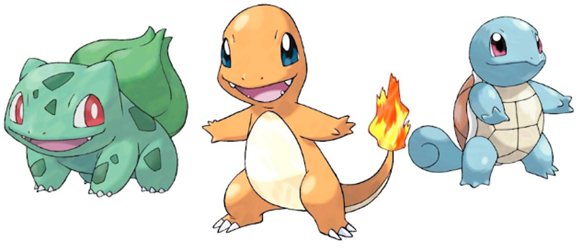

Now, let's import all the packages we'll need for the following exercises. 

We'll then load in the dataset using the **read_csv** method.

The **index_col** argument tells Python that the first row of the data file contains column headers. T

he encoding arguments tells Pandas that we have to import the file and read it with a specific encoder in order to special characters such as commas. 

Remember, you will need to alter the file path part of the first string argument being fed into the **pd.read_csv()** function in order to match the file path to where you saved the data file.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df1 = pd.read_csv("pokemon_dataset.csv", index_col=0, encoding="ISO-8859-1")

## Examine the dataset
In the previous session, we used NumPy's **.mean()**, **.median()**, etc, methods in order to calculate summary statistics. These can be used on a Pandas series, and therefore a variable in a Pandas dataframe. However, Pandas also has its own in-built methods for doing many of these tasks, and we'll use these below.

You can use the **.head()** and **.tail()** functions in order to view the first 5 or last 5 rows of data in a dataframe, respectively. 

You can also put **n=10** within the parentheses if you want to see the top or bottom 10 records, for example. 

The **...** between the two middle columns is Pandas' way of informing you that there are additional variables in the dataframe, but they can't all fit on the screen.

In [2]:
print(df1.head())

         Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False  


In [5]:
print(df1.tail())

          Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
#                                                                       
147    Dratini   Dragon     NaN    300   41      64       45       50   
148  Dragonair   Dragon     NaN    420   61      84       65       70   
149  Dragonite   Dragon  Flying    600   91     134       95      100   
150     Mewtwo  Psychic     NaN    680  106     110       90      154   
151        Mew  Psychic     NaN    600  100     100      100      100   

     Sp. Def  Speed  Stage  Legendary  
#                                      
147       50     50      1      False  
148       70     70      2      False  
149      100     80      3      False  
150       90    130      1       True  
151      100    100      1      False  


The **.describe()** function provides you with the summary statistics for all of the variables in the dataframe.

In [6]:
print(df1.describe())

           Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  151.00000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean   407.07947   64.211921   72.549669   68.225166   67.139073   66.019868   
std     99.74384   28.590117   26.596162   26.916704   28.534199   24.197926   
min    195.00000   10.000000    5.000000    5.000000   15.000000   20.000000   
25%    320.00000   45.000000   51.000000   50.000000   45.000000   49.000000   
50%    405.00000   60.000000   70.000000   65.000000   65.000000   65.000000   
75%    490.00000   80.000000   90.000000   84.000000   87.500000   80.000000   
max    680.00000  250.000000  134.000000  180.000000  154.000000  125.000000   

            Speed       Stage  
count  151.000000  151.000000  
mean    68.933775    1.582781  
std     26.746880    0.676832  
min     15.000000    1.000000  
25%     46.500000    1.000000  
50%     70.000000    1.000000  
75%     90.000000    2.000000  
max    140.000000    3.

## Recap of measures of central tendency and variation of a distrbution

If we wanted to summarise one of the Pokemon stats using one number, what would we choose?

We need a measure of central tendency, options include:

	- The mean, also known as the 	average, or the arithmetic mean. 
	- The median, or middle score in the range of data.
	- The mode, the most frequently occurring score.

![image-6.png](attachment:image-6.png)



In [8]:
print(df1['HP'].mean())

64.21192052980132


However, remember that the mean is susceptible to outliers.

Outliers are data points whose value is far greater or far less than the rest of the data points.

So, we may want a summary statistic that is immune to the impact of outliers...
This is where the median comes in.

Because the mean is calculated based on the rankings of the data and not on the value of the data, it is immune to outliers.

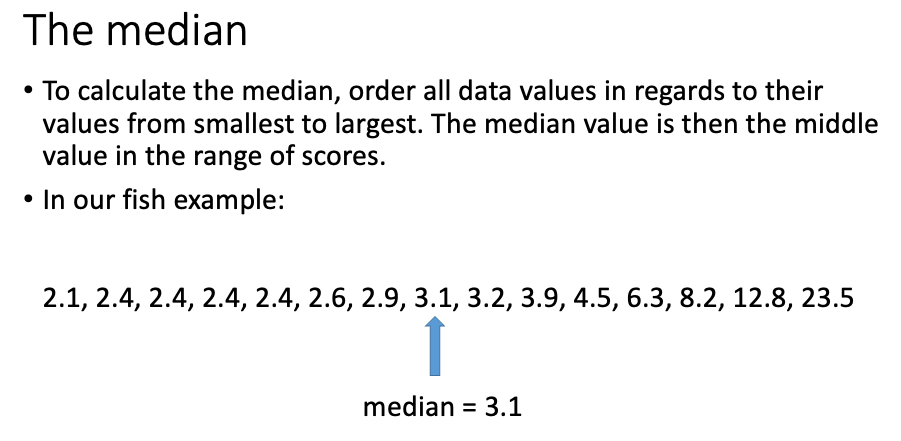

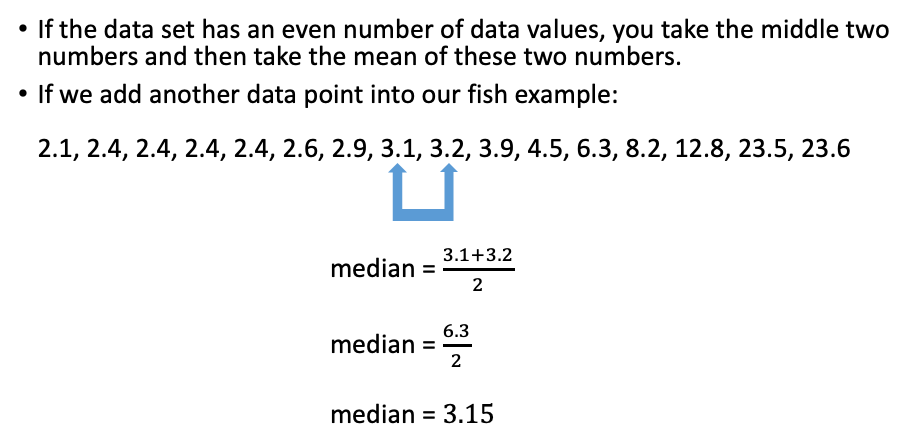

In [10]:
print(df1['HP'].median())

60.0


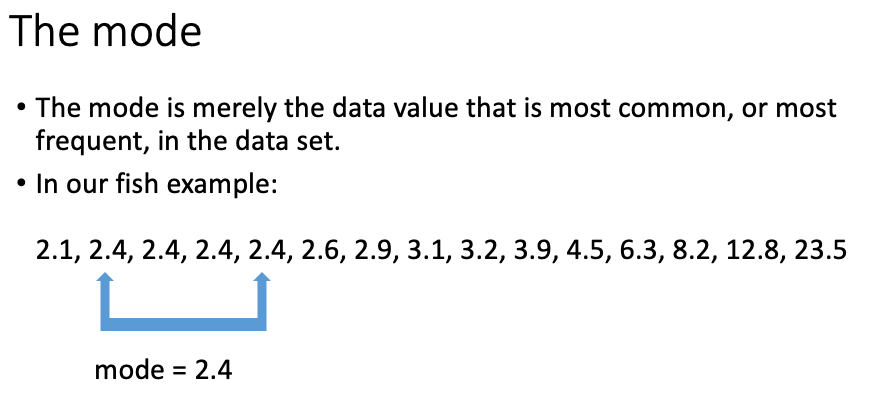

In [12]:
print(df1['HP'].mode())

0    65
Name: HP, dtype: int64


The variance is the mean squared distance of the data from their mean.

In other words, it’s a measure of how far the data are spread.

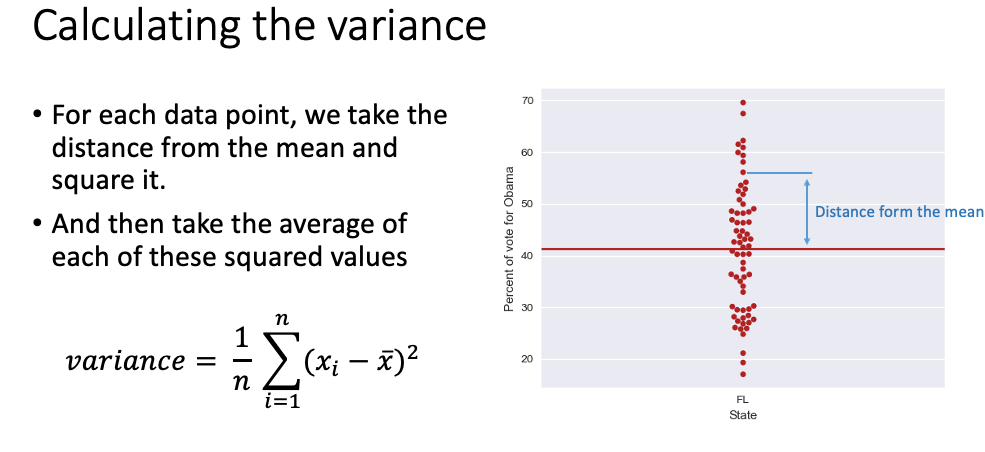

Calculating the variance in Python is easy using Numpy's **.var()** method.

In [13]:
print(np.var(df1['HP']))

811.9815797552737


The calculation for the variance uses squared values.

This means that the variance is reported as squared quantities.

It does not therefore have the same units as to what we measured In this case, in this case, the HP stats for all Pokemon in our dataset. After all, ‘squared HP’, which is not a thing.

We are therefore interested in the squared root of the variance, which converts the statistic back into its original unit of measurement.

This is known as…

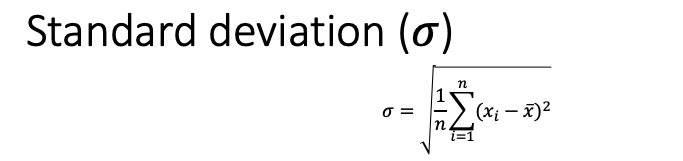

Again, this is really easy to calculate in Python using NumPy's **.std()** method:

In [ ]:
print(np.std(df1['HP']))

You’ll notice that, as expected, the answer is the same as that which you would get if you first calculated the variance and then took the square root of the result.

In [14]:
HP_mean = df1['HP'].mean()
HP_var = np.var(df1['HP'])
print(np.sqrt(HP_var))

28.49529048378475


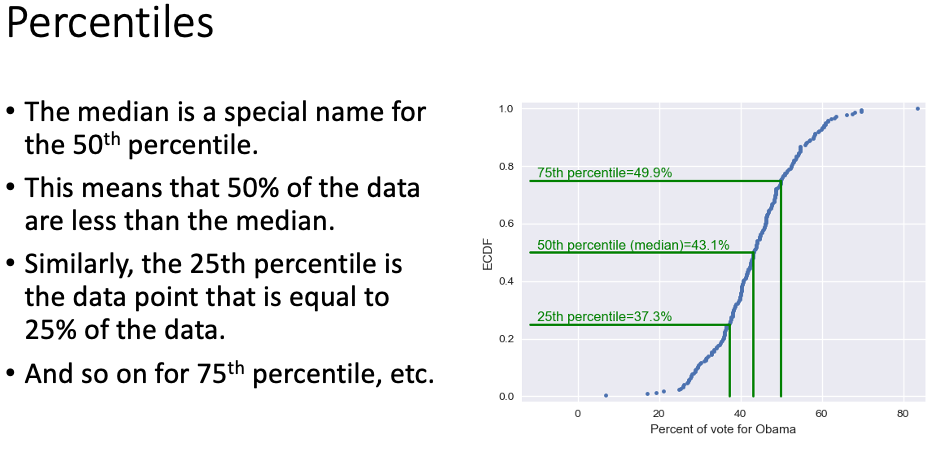

Percentiles are useful summary statistics and can easily be calculated using NumPy's **.percentile()** method.

This method takes two arguments.

The first is the variable that you want the percentiles calculated for. 

The second are which percentailes you want. Typically, we use the 25th, 50th (median), and 75th percentiles.

In [15]:
print(np.percentile(df1['HP'], [25, 50, 75]))

[45. 60. 80.]


This is how we calculate each of these measures independently.

However, as we saw a moment ago, we can get all of these measures for all variables in the dataset using only Pandas' **.describe()** method:

In [16]:
print(df1.describe())

           Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  151.00000  151.000000  151.000000  151.000000  151.000000  151.000000   
mean   407.07947   64.211921   72.549669   68.225166   67.139073   66.019868   
std     99.74384   28.590117   26.596162   26.916704   28.534199   24.197926   
min    195.00000   10.000000    5.000000    5.000000   15.000000   20.000000   
25%    320.00000   45.000000   51.000000   50.000000   45.000000   49.000000   
50%    405.00000   60.000000   70.000000   65.000000   65.000000   65.000000   
75%    490.00000   80.000000   90.000000   84.000000   87.500000   80.000000   
max    680.00000  250.000000  134.000000  180.000000  154.000000  125.000000   

            Speed       Stage  
count  151.000000  151.000000  
mean    68.933775    1.582781  
std     26.746880    0.676832  
min     15.000000    1.000000  
25%     46.500000    1.000000  
50%     70.000000    1.000000  
75%     90.000000    2.000000  
max    140.000000    3.

We now have three summary statistics.

However, the point of summary statistics is to keep things concise, but we are starting to get a lot of different numbers here.

This is where quantitative EDA meets graphical EDA.

## Plotting a histogram in Python

We could spend time staring at these numbers, but that is unlikely to offer us any form of insight. We could begin by conducting all of our statistical tests. However, a good field commander never goes into battle without first doing a recognisance of the terrain, and this is exactly what EDA is for.

Histograms are really useful for looking at the distribution of a variable; the frquency of each value within a variable.

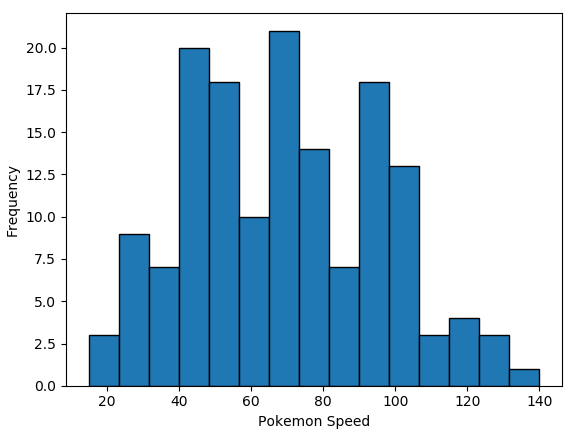

Now, lets look at how to create such a histogram.

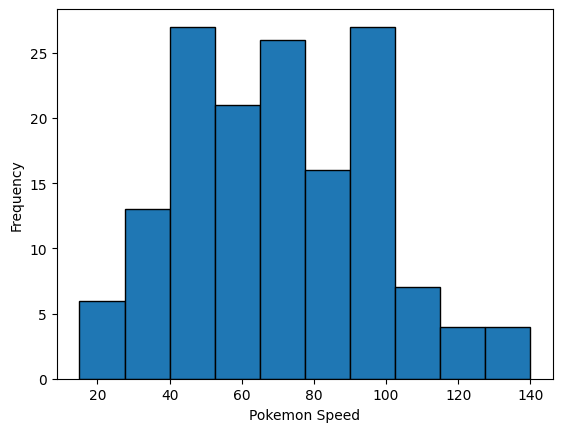

In [18]:
#We call matplotlib's histogram function with plt.hist. We then say that we want a histogram of the speed variable.
#The histtype argument tells Python that we want a bar-type histogram, and the ec argument tells it that we want
#black lines around our bars.
g = plt.hist(df1['Speed'], histtype='bar', ec='black')
#Label our x-axis and y-axis
g = plt.xlabel('Pokemon Speed')
g = plt.ylabel('Frequency')
#We then tell Python to show us the graph.
plt.show()

### Bins

You may have noticed the two histograms we’ve seen so far look different, despite using the exact same data. 

This is because they have different bin values. 

This refers to the width and number of bars in the graph. The top graph used the default bins generated by **plt.hist()**, while the one on the bottom used bins that I specified.

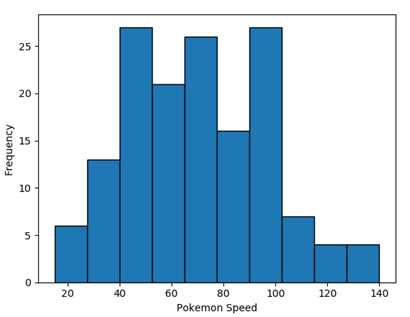

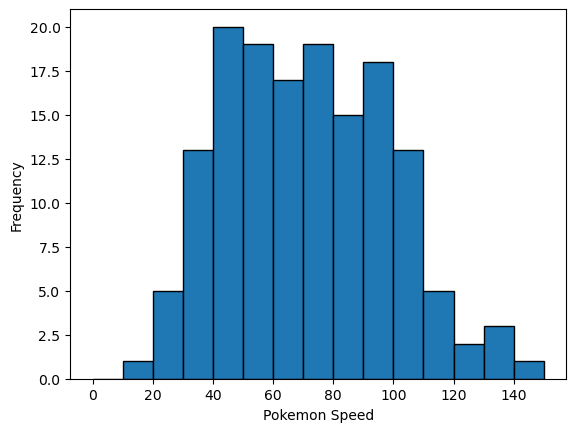

There are a couple of ways to manipulate bins in matplotlib.

Below, we specify where the edges of the bars of the histogram are located; the bin edges. 

The first bin will begin at 0 and end at 10, the second bar will begin at 10 and ends at 20, etc. We create a list of these bin edges, and feed it in to the bins argument.

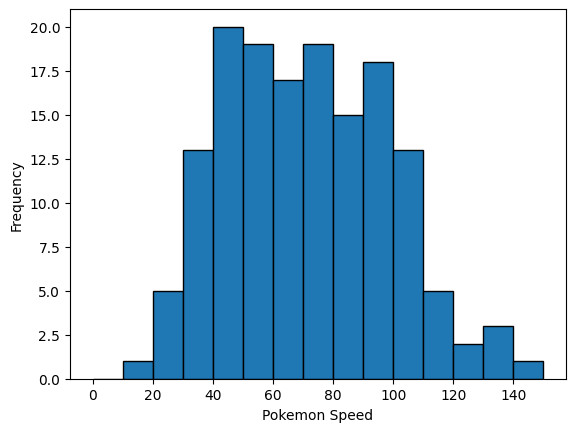

In [19]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
g = plt.hist(df1['Speed'], histtype='bar', ec='black', bins=bin_edges)
g = plt.xlabel('Pokemon Speed')
g = plt.ylabel('Frequency')
plt.show()

You can also specify the total number of bins you want, and Matplotlib will automatically generate a number of evenly spaced bins.


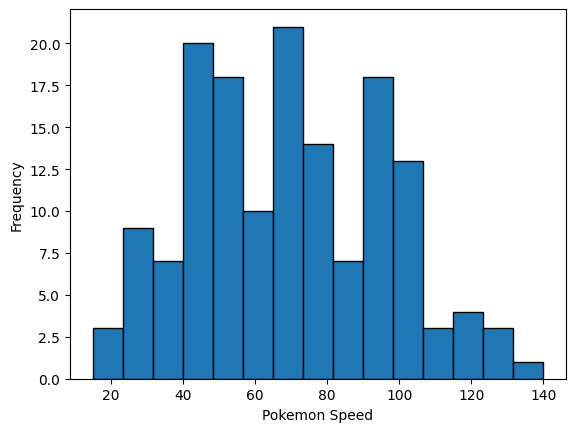

In [20]:
g = plt.hist(df1['Speed'], histtype='bar', ec='black', bins=15)
g = plt.xlabel('Pokemon Speed')
g = plt.ylabel('Frequency')
plt.show()

## Seaborn


Matplotlib is a powerful, but sometimes unwieldy, Python library. Indeed, for a long while the default behaviour of matplotlib was to produce graphs like the follow:

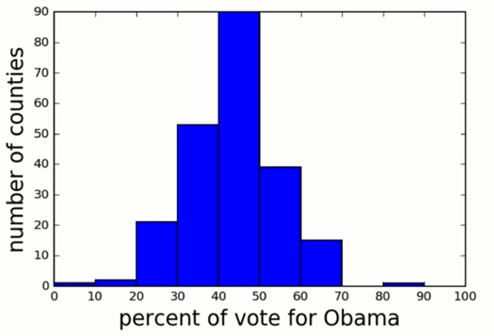



Using Jupyter notebooks and Spyder saves us from having to deal with tinkering all the various parameters that you would need to set in order to get a graph to look like the following:

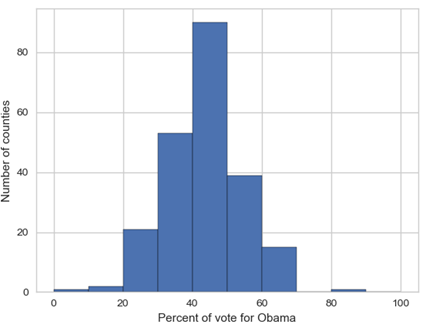

This happens by "borrowing" some of the default settings from a package called Seaborn. 

Seaborn provides a high-level interface to Matplotlib and makes it easier to produce graphs like the second one above. 

In this sense, it is essentially a "wrap around" which allows you to create graphs within Seaborn, which are then created using all of the best feastures of matplotlib.

### Benefits of Seaborn

Seaborn offers:

- Default themes that are aesthetically pleasing.
- Setting of custom colour palettes.
- Making attractive statistical plots.
- Easy to generate and felxibility in visualising distributions.
- Visualising information from matrices and dataframes.

The last three points have led to Seaborn becoming the exploratory data analysis tool of choice for many Python users.

### Plotting with Seaborn
- One of Seaborn's greatest strengths is its diversity of plotting functions. 
- Most plots can be created with one line of code.

For example….

### Histograms

Seaborn creates a form of histrogram referred to as a density plot.

C:\Users\user\AppData\Local\Temp\ipykernel_33624\3046771098.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Speed'])


<AxesSubplot:xlabel='Speed', ylabel='Density'>

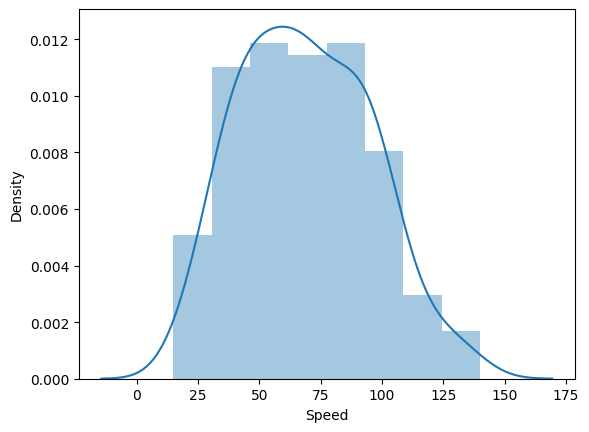

In [22]:
#Seaborn has a number of styles you can import to make the graphs look different. Here, we'll use the default style.
sns.set_style()
sns.distplot(df1['Speed'])

## Scattergraph

Scattergraphs are incredibly useful for understanding the relationship between two variables. Creating a scatterplot with a line of best fit is also incredibly simple with Seaborn, using the lmplot() function.

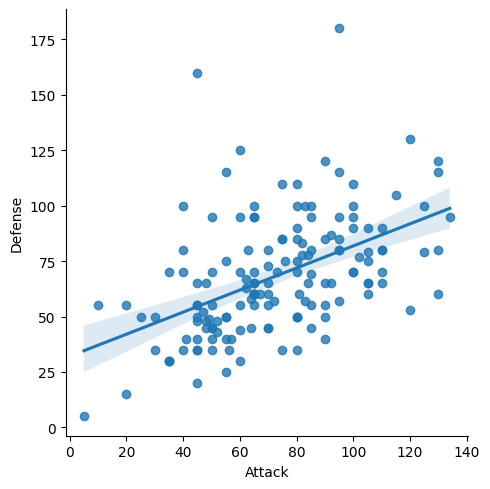

In [24]:
#Specify, as a string variable, the variable we want on the x- and y- axis. 
#Then specify the particular dataframe that we want to draw the variables from using the data= argument.
sns.lmplot(x='Attack', y='Defense', data=df1)

Seaborn doesn't have a dedicated scatter plot function, this is why we used the linear model plot **lmplot()** function.

However, if we do not want the line of best fit on our graph, we can remove it by setting the **fit_reg** argument to false.

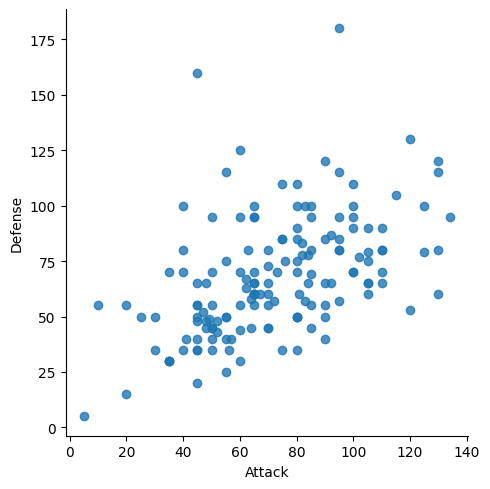

In [25]:
sns.lmplot(x='Attack', y='Defense', data=df1, fit_reg=False)

## The hue function

Seaborn allows us to add useful features to graphs that could otherwise be tricky to implement.

The **hue** method, for example, allows us to colour our data pints in accordance with that data point's value in a particular variable.

You may be aware that Pokemon evolve through different stages. So, lets re-create our attack and defence graph, but this time, lets colour the data points in accordance with the pokemon's evolutionary stage.

To do this, we just feed the 'Stage' variable into the hue argument.

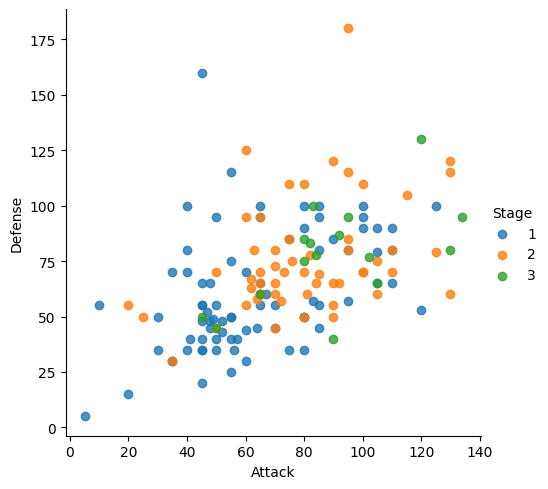

In [26]:
sns.lmplot(x='Attack', y='Defense', data=df1, fit_reg=False, hue='Stage')

## Factorplots (called "catplots" in the latest version of Seaborn)

If we instead wanted to create three separate scattplots, one for each of the different evolutionary stages, we can do that with Seaborn's **catplot()** function.

The arguments here are the same as those for the **lmplot()** function, with just two additons. 

The first is the **col** argument, which is how we tell Seaborn how to breakdown the data into a number of different graphs. Since we want a graph for each of the evolutionary stages, we are going to feed the "Stage" variable into it. 

The second is kind, which is how we tell Seaborn what kind of plot we want, and we are going to ask for a swarmplot.

Swamplots are useful in situations whereby you have categorical variables on the x-axis and continuous data on the y-axis. Here, we'll plot the type of the pokemon, fire, water, etc, against their attack level. 

The **set_xticklabels()** function allows us to set the settings for the x-axis ticks.

Here, we are going to put them on an incline.

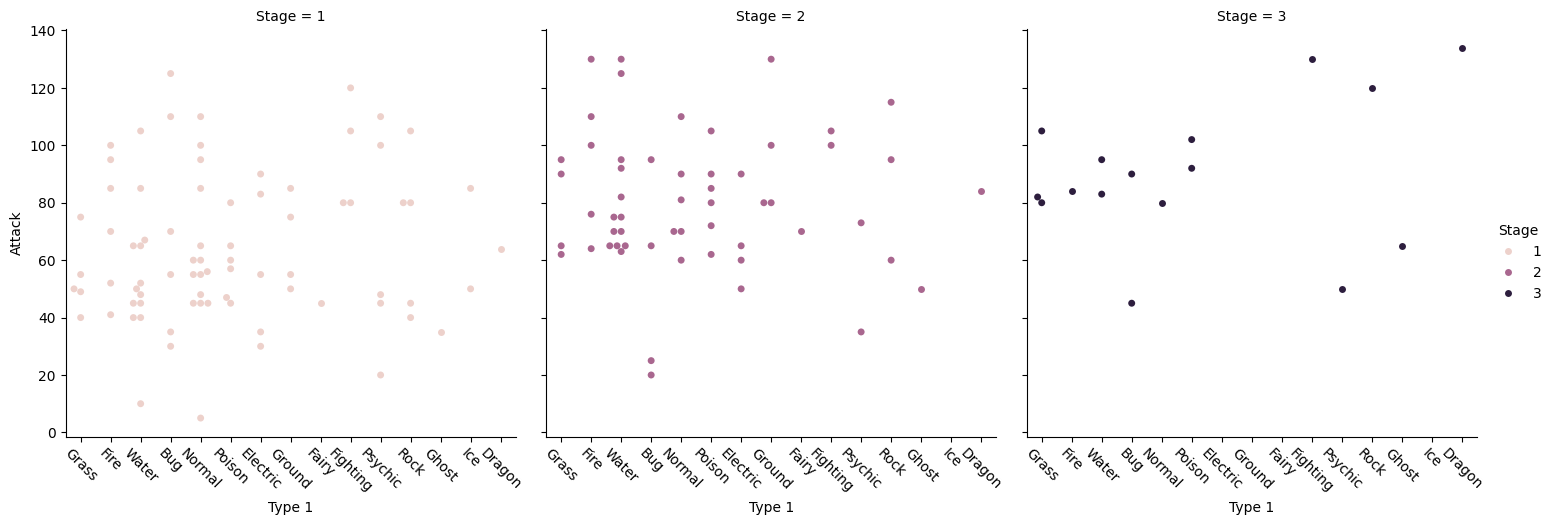

In [27]:
g = sns.catplot(x='Type 1', y='Attack', data=df1, hue='Stage', col='Stage', kind='swarm')
g.set_xticklabels(rotation=-45)

## Boxplot

A boxplot can easily be created in Seaborn with the **.boxplot()** function.

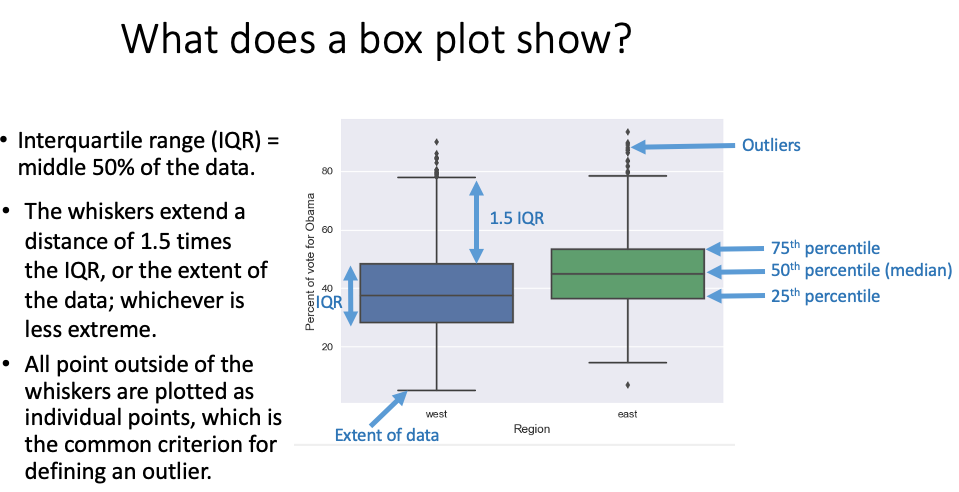

C:\Users\user\AppData\Local\Temp\ipykernel_33624\2273598955.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=-45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, '')]

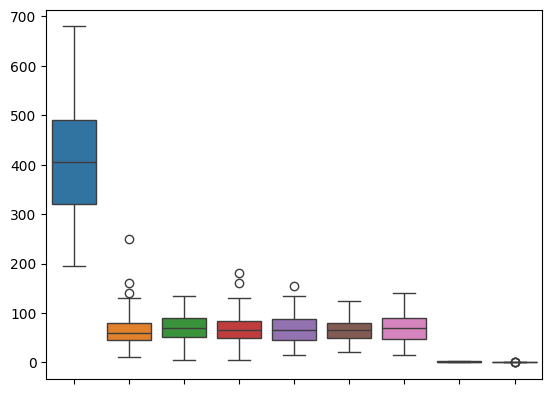

In [28]:
g = sns.boxplot(data=df1)
#We get a list of labels from g using g.get_xticklabels(), then feed it into .set_xticklabels(), so that
#we can manipulate the axis labels
g.set_xticklabels(g.get_xticklabels(), rotation=-45)

The total, stage, and legendary entries are not combat stats so we should remove them.

Pandas makes this easy to do, we just create a new dataframe. We just use Pandas’ **.drop()** function to create a dataframe that doesn’t include the variables we don’t want.

<AxesSubplot:>

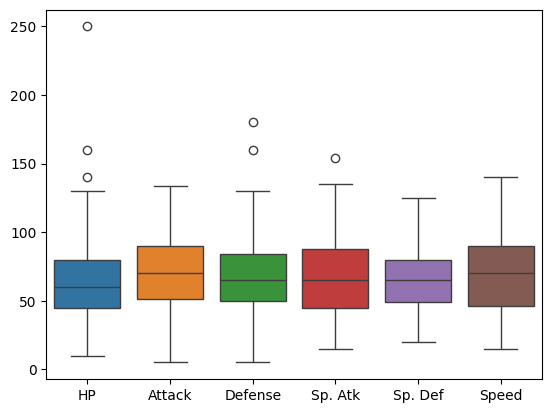

In [29]:
#When using the .drop function, we specify the axis that we do NOT want in our new dataframe within a list.
stats_df = df1.drop(['Total', 'Stage', 'Legendary'], axis=1)
#Feed our new dataframe into the boxplot() function.
sns.boxplot(data=stats_df)

## Seaborn themes

It was mentioned above that seaborn has a number of default themes that you can import in order to change the appearance of graphs. 

Until now, we have been using the default Seaborn style, which we set by including the **sns.set_style()** at the top of our code. 

Now, we'll set the whitegrid style, in order to create graphs with y-axis lines going across the background of our graphs.

<AxesSubplot:>

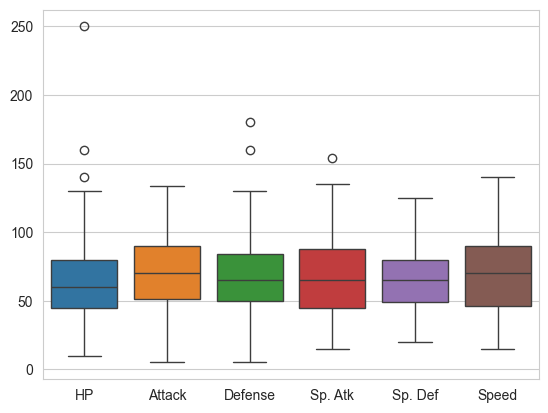

In [30]:
sns.set_style('whitegrid')
sns.boxplot(data=stats_df)

## Violin plots

If you want to plot categorical data on the x-axis and continuous data on the y-axis in a way that allows you to easily see the variance between categories, we can use a violin plot.

C:\Users\user\AppData\Local\Temp\ipykernel_33624\960508352.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=-45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, '')]

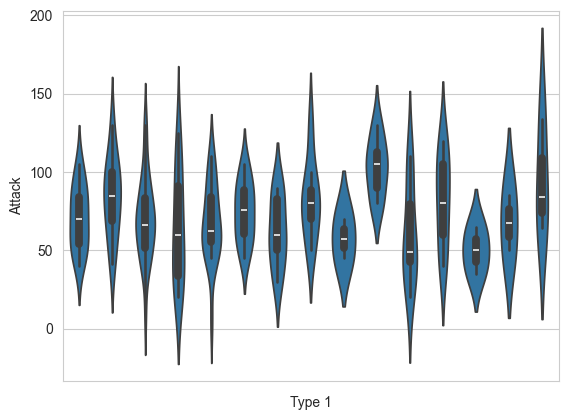

In [31]:
g = sns.violinplot(x='Type 1', y='Attack', data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=-45)

Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance. But there is something not right here…

The colours! The grass type Pokemon should not be coloured pink or red, but should surely be coloured green.

### Seaborn's colour palettes

This brings us to colour palettes. Seaborn allows us to easily set custom colour palettes by providing it with an ordered list of colour hex values. 

Seaborn also has a number of in-built colour palettes that you can use, details of which can be found here https://seaborn.pydata.org/tutorial/color_palettes.html. 

Here, however, we are going to use a custom colour palette, which we first define as a list object that will define one colour for each of the Pokemon types.

In [32]:
type_colours = ['#78C850', #Grass
               '#F08030', #Fire
               '#6890F0', #Water
               '#A8B820', #Bug
               '#A8A878', #Normal
               '#A040A0', #Poison
               '#F8D030', #Electric
               '#E0C068', #Ground
               '#EE99AC', #Fairy
               '#C03028', #Fighting
               '#F85888', #Psychic
               '#B8A038', #Rock
               '#705898', #Ghost
               '#98D8D8', #Ice
               '#7038F8', #Dragon
               ]

We can then feed our custom colour palette into the palette argument.

C:\Users\user\AppData\Local\Temp\ipykernel_33624\403702601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(x='Type 1', y='Attack', data=df1, palette=type_colours)
C:\Users\user\AppData\Local\Temp\ipykernel_33624\403702601.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=-45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, '')]

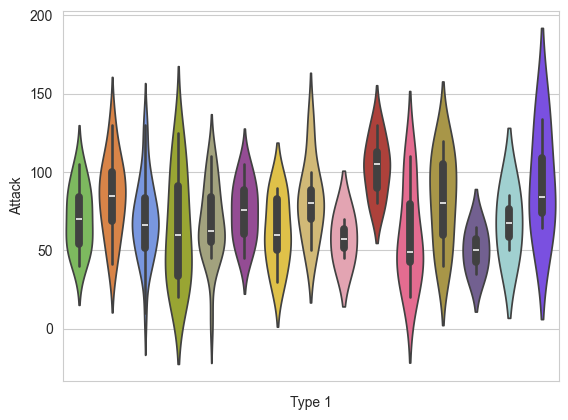

In [33]:
g = sns.violinplot(x='Type 1', y='Attack', data=df1, palette=type_colours)
g.set_xticklabels(g.get_xticklabels(), rotation=-45)

We only have a limited number of observations, so we could use a swarmplot. 

In a swarmplot, each data point is an observation, but they are grouped together by a variable's values. 

Here, we'll group the data points by the Type of the pokemon.

C:\Users\user\AppData\Local\Temp\ipykernel_33624\1978260667.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.swarmplot(x='Type 1', y='Attack', data=df1, palette=type_colours)
C:\Users\user\AppData\Local\Temp\ipykernel_33624\1978260667.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=-45)


[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Poison'),
 Text(6, 0, 'Electric'),
 Text(7, 0, 'Ground'),
 Text(8, 0, 'Fairy'),
 Text(9, 0, 'Fighting'),
 Text(10, 0, 'Psychic'),
 Text(11, 0, 'Rock'),
 Text(12, 0, 'Ghost'),
 Text(13, 0, 'Ice'),
 Text(14, 0, 'Dragon')]

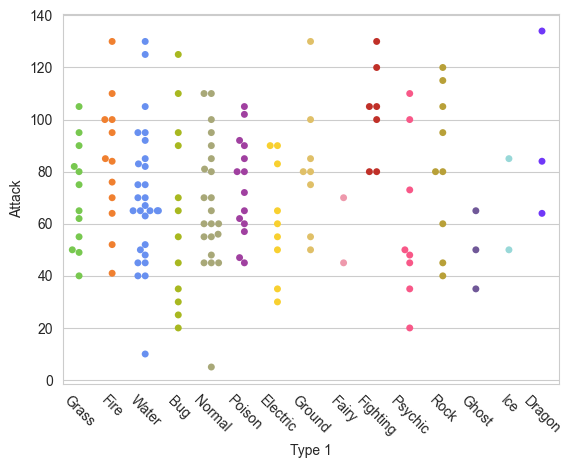

In [34]:
g = sns.swarmplot(x='Type 1', y='Attack', data=df1, palette=type_colours)
g.set_xticklabels(g.get_xticklabels(), rotation=-45)

## Overalapping plots

Both the swarmplot and the violinplot show similar information, so you may wish to combine the two.

C:\Users\user\AppData\Local\Temp\ipykernel_33624\3255342411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type 1', y='Attack', data=df1, palette=type_colours, inner=None)


Text(0.5, 1.0, 'Attack by Type')

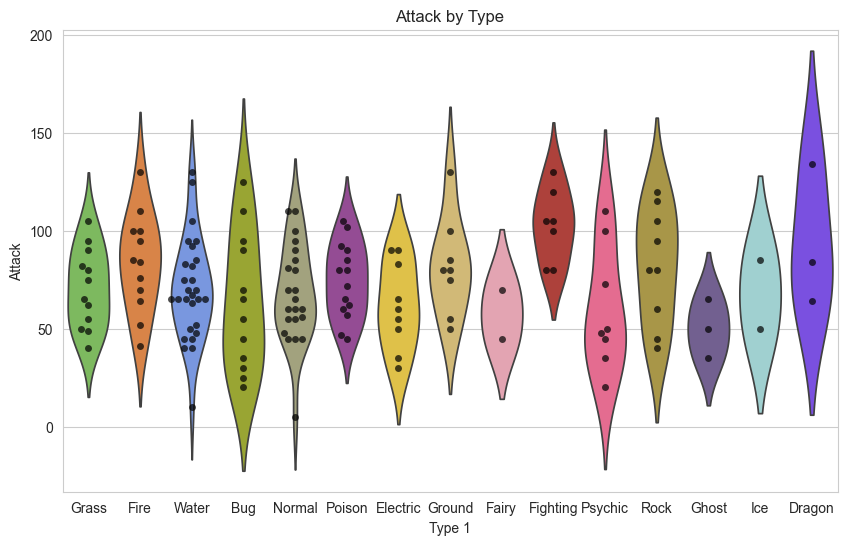

In [35]:
#Set the size of the figure canvas
plt.figure(figsize=(10,6))
#We add one additional argument, inner, which removes the bars inside of the violins
sns.violinplot(x='Type 1', y='Attack', data=df1, palette=type_colours, inner=None)
#Set the data points to black and use the alpha argument to give the dots some transparency.
sns.swarmplot(x='Type 1', y='Attack', data=df1, color = 'k', alpha=0.7)
#Add a title to the plot
plt.title('Attack by Type')

## Data Wrangling with Pandas

What if we wanted to create such a plot that included all of the other stats as well? In our current dataframe, all of the variables are in different columns:

In [36]:
print(df1.head())

         Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False  


So, if we wanted to visualise all the stats, then we'll have to "melt" the dataframe:

In [37]:
#We again use the .drop() function to create our dataframe without the following 3 variables.
stats_df = df1.drop(['Total', 'Stage', 'Legendary'], axis=1)

melted_df = pd.melt(stats_df, #The dataframe that we're going to melt.
                   id_vars=['Name', 'Type 1', 'Type 2'], #These are the variables we want to keep.
                   var_name='Stat') #This will the name of the new variable, which will be the melted variable.
print(melted_df.head())

         Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58


It's hard to see what we did from the above print statement, but we can see what we did by using the **.shape()** method:

In [38]:
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


The above print statements show that the number of variables has decreased from 9 to 6.

Corresponding to the way in which the 6 pokemon statistics columns, attack, speed, etc, have been merged into one.

The number of rows has also increased 6 times from 151 to 906. 

We see from looking at the stats column below that the HP stat for all of the individual pokemon are listed. 

Then, at row 151, we go back to the first pokemon and see its Attack variable, and so on for all of the stats.

In [39]:
print(melted_df.iloc[0])
print("_______")
print(melted_df.iloc[151])

Name      Bulbasaur
Type 1        Grass
Type 2       Poison
Stat             HP
value            45
Name: 0, dtype: object
_______
Name      Bulbasaur
Type 1        Grass
Type 2       Poison
Stat         Attack
value            49
Name: 151, dtype: object


We can now create a swarmplot using the newly created stats variable as the categorical variable on the x-axis.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.5% of the p

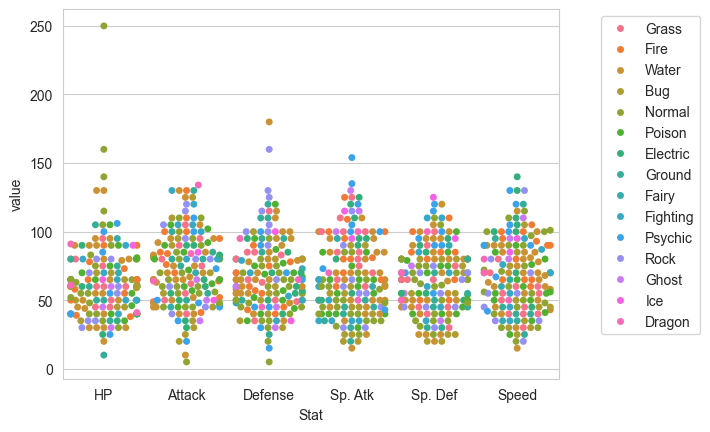

In [40]:
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')
#the loc argument places the legend in a rough location. The bbox_to_anchor then moves the legend into a more specific
#location.
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

This graph needs a few tweaks in order to make it look better.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Miniconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


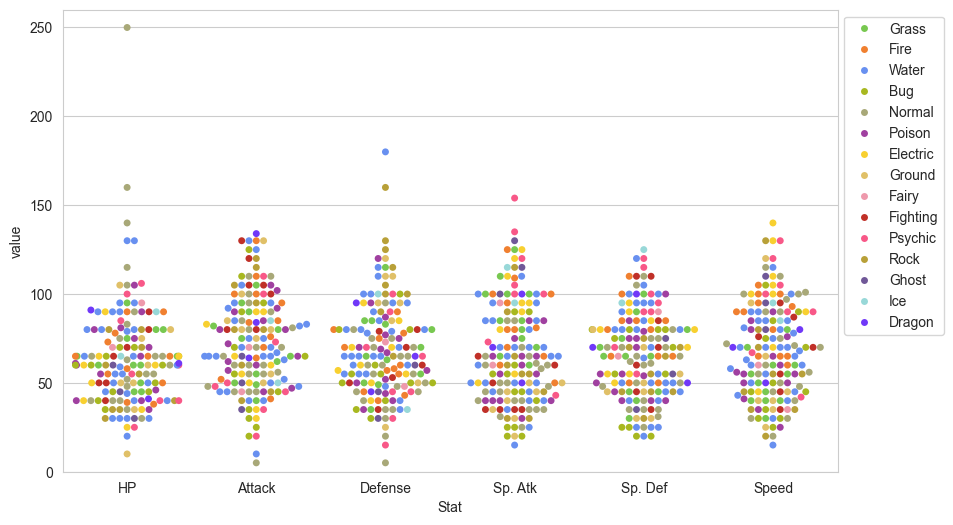

In [41]:
plt.figure(figsize=(10,6)) #Set the size of the figure canvas size
sns.swarmplot(x='Stat', #The variable for the x-axis
              y='value', #The variable for the y-axis
              data=melted_df, #The dataframe from which the data will be drawn.
              hue='Type 1', #Colour the data points by their evolutionary stage.
             palette=type_colours) #Use our special Pokemon colour palette.
plt.ylim(0, 260) #Adjust the y-axis
plt.legend(bbox_to_anchor=(1,1), loc=2) #Place the legend in a specific location

## Empirical cumulative distribution functions (ECDFs)

An alternative way of visualising a distribution of a variable in a large dataset is to use an ECDF. Here we have an ECDF that shows the percentages of different attack strengths of pokemon.

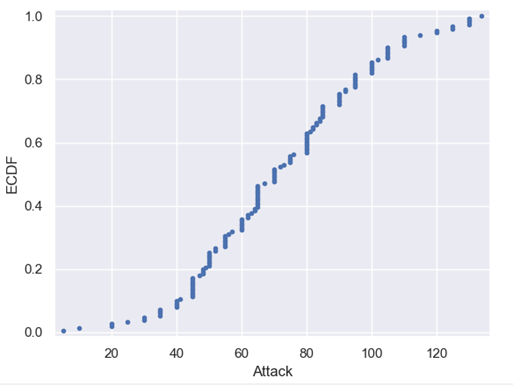

- An x-value of an ECDF is the quantity you are measuring; i.e. attacks strength.
- The y-value is the fraction of data points that have a value smaller than the corresponding x-value. For example…

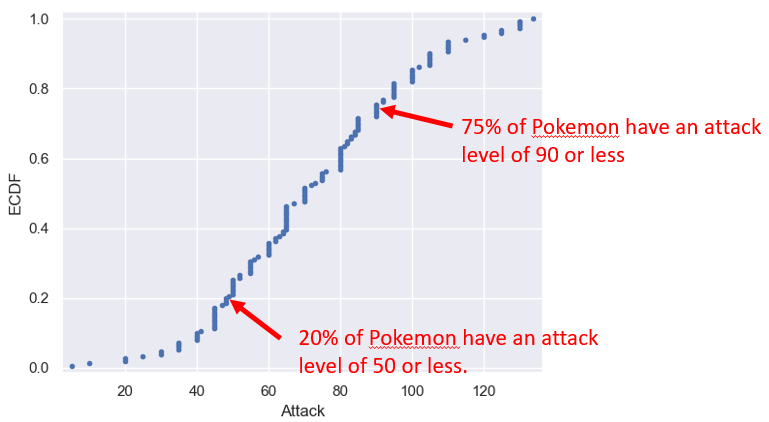

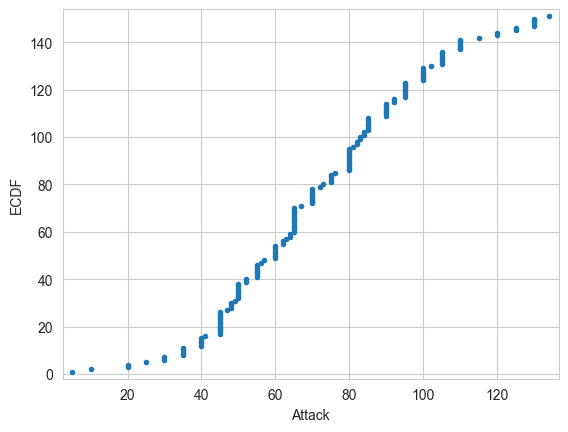

In [43]:
x = np.sort(df1['Attack']) #The variable for the x-axis
y = np.arange(1, len(x)+1/len(x)) #Calculate the fractions for the y-axis
g = plt.plot(x, y, marker='.', linestyle='none')
g = plt.xlabel('Attack')
g = plt.ylabel('ECDF')
plt.margins(0.02) #Add some space to the top of the graph so that half of the top data points are not cut off.
plt.show()

You can also plot multiple ECDFs on the same plot by creating multiple **plt.plot()** calls. As an example, here with have an ECDF for Pokemon attack, speed, and defence levels:


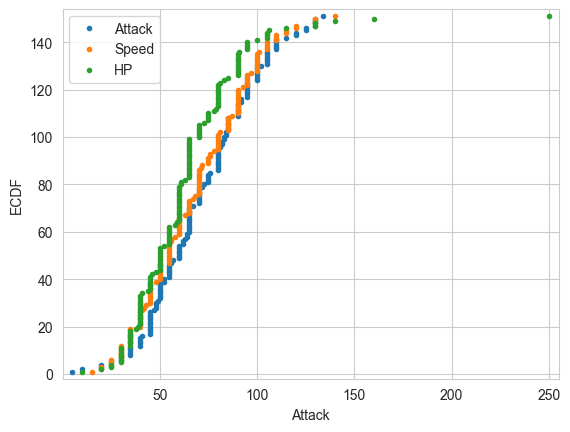

In [46]:
x1 = np.sort(df1['Attack']) #The variable for the x-axis
y1 = np.arange(1, len(x)+1/len(x)) #Calculate the fractions for the y-axis
g = plt.plot(x1, y1, marker='.', linestyle='none', label="Attack")

x2 = np.sort(df1['Speed']) #The variable for the x-axis
y2 = np.arange(1, len(x)+1/len(x)) #Calculate the fractions for the y-axis
g = plt.plot(x2, y2, marker='.', linestyle='none', label="Speed")

x3 = np.sort(df1['HP']) #The variable for the x-axis
y3 = np.arange(1, len(x)+1/len(x)) #Calculate the fractions for the y-axis
g = plt.plot(x3, y3, marker='.', linestyle='none', label="HP")

g = plt.xlabel('Attack')
g = plt.ylabel('ECDF')
plt.margins(0.02) #Add some space to the top of the graph so that half of the top data points are not cut off.
plt.legend()
plt.show()

We can see here that defence levels tend to be a little less than the other two.

### The usefulness of ECDFs

It is often quite useful to plot the ECDF first as part of your workflow as it shows all the data and gives a complete picture as to how the data are distributed.

## Heatmap

Heatmaps are useful for visualising matrix-like data. Here, we’ll plot the correlation of the stats_df variables.

['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary']


<AxesSubplot:>

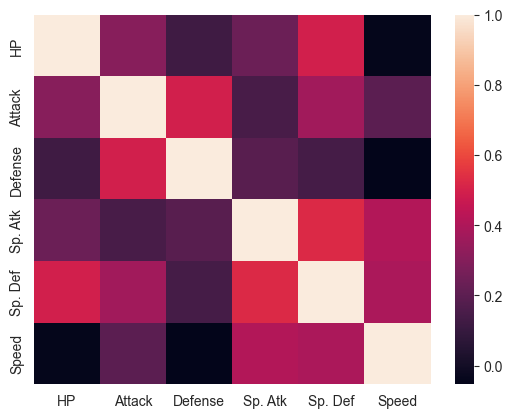

In [48]:
print(list(df1))
stats_df = df1.drop(['Name', 'Type 1', 'Type 2', 'Total', 'Stage', 'Legendary'], axis=1)
#The .corr() fucntion takes all of the variables in a dataframe
#and calculates the correlation between each one.
corr = stats_df.corr()
#We just then feed our data into Seaborn's heatmap function to create a heatmap.
sns.heatmap(corr)

## Bar plot

These visualise the distributions of categorical variables.

To create a bar plot, we use Seaborn's countplot function:

C:\Users\user\AppData\Local\Temp\ipykernel_33624\1577422673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 1', data=df1, palette=type_colours) #We even fed in our fancy custom colour palette.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

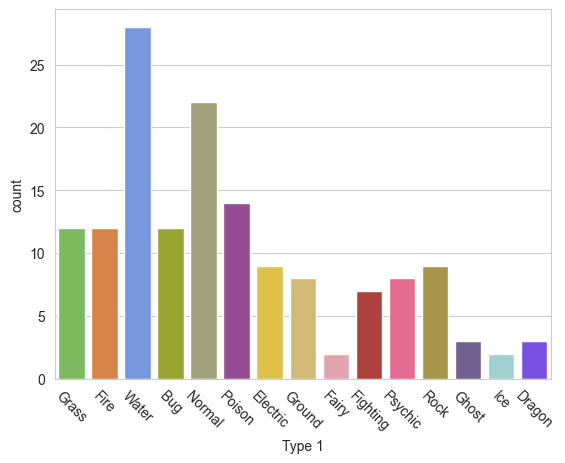

In [49]:
sns.countplot(x='Type 1', data=df1, palette=type_colours) #We even fed in our fancy custom colour palette.
plt.xticks(rotation=-45)

## Joint distribution plot

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

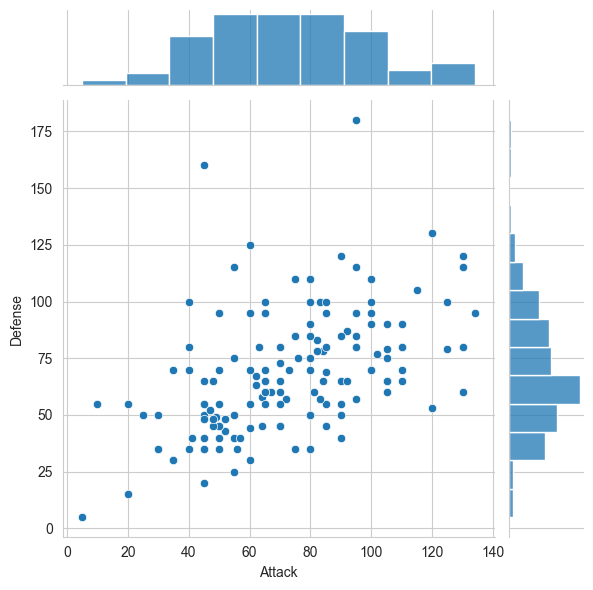

In [51]:
sns.jointplot(x='Attack', y='Defense', data=df1)

## End of session 1 and term 1!